<a href="https://colab.research.google.com/github/debanjan02/BreakHis/blob/master/K_means/magnification_100x/BreakHis_100_K_means_k4_bin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import to_categorical
from sklearn.cluster import KMeans, estimate_bandwidth, MeanShift
from glob import glob
import cv2
import fnmatch

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
x = np.load('/content/drive/My Drive/project/x_BreakHis_100_K_mean_K4.npy')
y = np.load('/content/drive/My Drive/project/y_BreakHis_100_bin.npy')

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101)
y_train = to_categorical(y_train, num_classes = 2)
y_valid = to_categorical(y_valid, num_classes = 2)

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 
from keras.applications.inception_v3 import InceptionV3
input_tensor = Input(shape=(299,299,3))
base_model = InceptionV3(input_tensor = input_tensor, include_top = False, pooling = 'average')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation = 'relu')(x)
x = Dense(2, activation = 'softmax')(x)
model = Model(base_model.input,x)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_283 (Conv2D)             (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_283 (BatchN (None, 149, 149, 32) 96          conv2d_283[0][0]                 
__________________________________________________________________________________________________
activation_283 (Activation)     (None, 149, 149, 32) 0           batch_normalization_283[0][0]    
__________________________________________________________________________________________________
conv2d_284

In [0]:
from keras.callbacks import ModelCheckpoint
mcp = ModelCheckpoint(filepath='/content/drive/My Drive/project/model_check_path_BreakHis_100_bin_K_mean_k4_inception_v3',monitor="val_acc", save_best_only=True, save_weights_only=False)
hist = model.fit(x_train,y_train,batch_size = 32, epochs = 150, verbose=1,  validation_data=(x_valid, y_valid), callbacks=[mcp])

Train on 4994 samples, validate on 1249 samples
Epoch 1/150
4994/4994 [==============================] - 221s 44ms/step - loss: 0.3154 - acc: 0.8751 - val_loss: 2.2500 - val_acc: 0.4788
Epoch 2/150
4994/4994 [==============================] - 197s 40ms/step - loss: 0.2212 - acc: 0.9139 - val_loss: 4.5241 - val_acc: 0.3587
Epoch 3/150
4994/4994 [==============================] - 197s 39ms/step - loss: 0.2158 - acc: 0.9119 - val_loss: 0.2672 - val_acc: 0.9135
Epoch 4/150
4994/4994 [==============================] - 197s 39ms/step - loss: 0.1714 - acc: 0.9367 - val_loss: 0.5158 - val_acc: 0.8775
Epoch 5/150
4994/4994 [==============================] - 197s 39ms/step - loss: 0.0844 - acc: 0.9726 - val_loss: 0.2911 - val_acc: 0.9167
Epoch 6/150
4994/4994 [==============================] - 197s 39ms/step - loss: 0.0828 - acc: 0.9694 - val_loss: 0.3107 - val_acc: 0.8751
Epoch 7/150
4994/4994 [==============================] - 197s 39ms/step - loss: 0.0645 - acc: 0.9764 - val_loss: 0.2391 - va

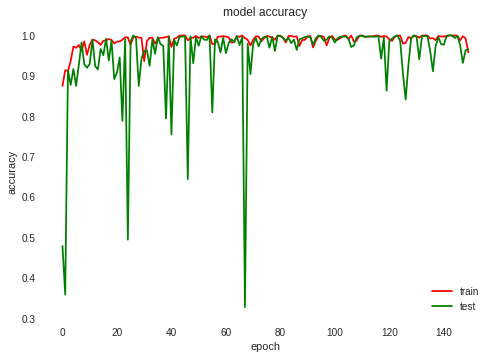

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['acc'], color='red')
ax.plot(hist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

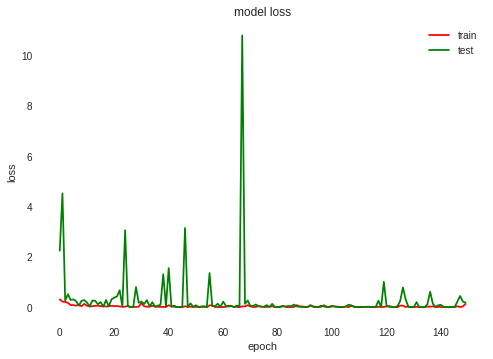

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['loss'], color='red')
ax.plot(hist.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
model.load_weights('/content/drive/My Drive/project/model_check_path_BreakHis_100_bin_K_mean_k4_inception_v3')

In [0]:
from sklearn.metrics import classification_report
pred = model.predict(x_valid)
print(classification_report(np.argmax(y_valid, axis = 1),np.argmax(pred, axis = 1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       1.00      1.00      1.00       843

   micro avg       1.00      1.00      1.00      1249
   macro avg       1.00      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249



In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.grid(b=False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

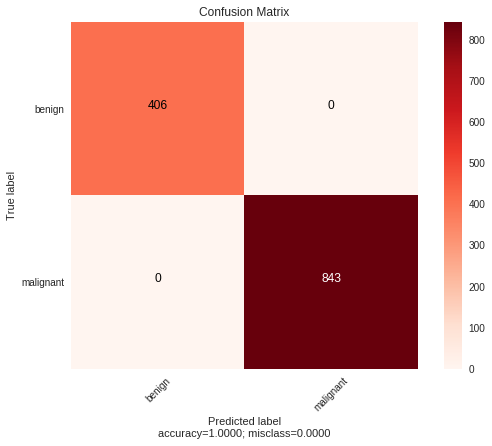

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_valid, axis = 1),np.argmax(pred, axis = 1))
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['benign','malignant'],
                      title        = "Confusion Matrix")

In [0]:
model.layers

In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.layers import Input
from keras import activations
from keras.models import load_model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import initializers
from keras.models import Sequential, Model

from keras.applications import imagenet_utils
import numpy as np

import h5py as h5py

from __future__ import division

from vis.visualization import visualize_activation,visualize_saliency,overlay,visualize_cam
from vis.utils import utils


In [0]:
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from vis.visualization import visualize_cam
from vis.utils import utils
from keras import activations
layer_idx = utils.find_layer_idx(model, 'dense_6')
print("Remove Activation from Last Layer")
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
print("Done. Now Applying changes to the model ...")
model = utils.apply_modifications(model)
#visualize_cam(model, Dense_2,seed_input = x_valid[-1], filter_indices=[22])

Remove Activation from Last Layer
Done. Now Applying changes to the model ...


In [0]:
from google.colab import files

im_file = files.upload()


Saving SOB_M_DC-14-2985-100-001.png to SOB_M_DC-14-2985-100-001.png


In [0]:
im_file="husky.jpg"

img1 = x_valid[7]
img1 = np.expand_dims(img1, axis=0)
img1 = preprocess_input(img1)
layer_idx = utils.find_layer_idx(model, 'dense_6')
heatmap = visualize_cam(model, layer_idx, filter_indices=248, seed_input=img1)

ValueError: ignored

In [0]:
def visualize_class_activation_map():

        #Reshape to the network input shape (3, w, h).
        img = np.array([np.transpose(np.float32(x_valid[7]), (2, 0, 1))])
        
        #Get the 512 input weights to the softmax.
        class_weights = model.layers[-1].get_weights()[0]
        final_conv_layer = get_output_layer(model, "global_average_pooling2d_4")
        get_output = K.function([model.layers[0].input], \
                    [final_conv_layer.output, 
        model.layers[-1].output])
        [conv_outputs, predictions] = get_output([img])
        conv_outputs = conv_outputs[0, :, :, :]

        #Create the class activation map.
        cam = np.zeros(dtype = np.float32, shape = conv_outputs.shape[1:3])
        target_class = 1
        for i, w in enumerate(class_weights[:, target_class]):
                cam += w * conv_outputs[i, :, :]
        return cam

In [0]:
plt.imshow(visualize_class_activation_map())

NameError: ignored

In [0]:
heat_map = visualize_cam(model, utils.find_layer_idx(model, 'dense_8'), y_valid[7], x_valid[7])

TypeError: ignored

In [0]:
from keras import backend as K
output = model.output[:, argmax]
last_conv_layer = model.get_layer('global_average_pooling2d_4')
grads = K.gradients(output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
pooled_grad.shape

NameError: ignored

In [0]:
visuaheat_map = visualize_cam(model, utils.find_layer_idx(model, 'dense_8'), filter_indices=[22],seed_input=x_valid[1],penultimate_layer_idx=utils.find_layer_idx(model, 'global_average_pooling2d_4'))

ValueError: ignored